### Analyzing the Stroop Effect

In this project, I will investigate a classic phenomenon from experimental psychology called the [Stroop Effect](https://en.wikipedia.org/wiki/Stroop_effect). 
In psychology, the Stroop effect is a demonstration of interference in the reaction time of a task. When the name of a color (for example "blue", "yellow","green", etc) is printed in a color that is not denoted by the name (e.g., the word "green" printed in red ink instead of green ink), naming the color of the word takes longer and is more prone to errors than when the color of the ink matches the name of the color.

In the porcess of investigating this phenomenon I will review the basic concepts of statistics, including:

* How to identify components of an experiment

* How to use descriptive statistics to describe qualities of a sample

* How to set up a hypothesis test, make inferences from a sample, and draw conclusions based on the results



In this scenario the dependent variable is time and the independent variable is whether the color word combination is congruent or incongruent.

I will be performing a hypothesis test using bootstrapping to obtain p, and I will also carry out a paired sample (dependent), one tailed t-test. For these tests I will let the Null hypothesis state that the difference in time taken when reading congruent data is either less than or equal to the time taken to read incongruent data. Consequently, my Alternative hypothesis will state that the time taken to read incongruent data is longer than the time taken to read incongruent data. I have chosen these hypothesis as explained above since my alternative hypothesis is what I want to test, which is whether there is a significant statistical indication that it takes the longest to read incongruent data. <br/>

NULL HYPOTHEEIS :  $μ_I$ - $μ_C$ =< 0 <br/> 

ALTERNATIVE HYPOTHESIS : $μ_I$ - $μ_C$ > 0 <br/> 

Where:<br/> $μ_C$ is the mean time taken to read with congruent data, the congruent population mean<br/>
$μ_I$ is the mean time taken to read with incongruent data, the incongruent population mean

I chose to use a paired sample, one tailed t-test for the following reasons: <br/>

* a t-test can be used to determine whether the mean of the differences between two paired samples differs from 0
* specifically, a paired sample t-test is used since both experiments (reading the congruent words and the incongruent words) were carried out on the same group of people, and not on two different groups of people. In other words there are two time measurements that can be compared for each person in the experiment.


The one (and paired) sample t-tests are considered "robust"for violations of normal distribution and have the following assumptions:

* Interval or ratio scale of measurement (approximately interval)
* Random sampling from a defined population
* Characteristic is normally distributed in the population

The reason for using a t-test rather than a z-test (which is also used to compare the difference in population means) is because the sample size in this case is small and the population standard deviation is not known.


First I will import the necessary libraries and read in the dataset. The name of the data file is 'stroopdata.csv'.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('stroopdata.csv')

df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


Below are some descriptive statistics regarding this dataset.

In [3]:
mean_con = df['Congruent'].mean()
mean_con

14.051125000000004

In [4]:
mean_incon = df['Incongruent'].mean()
mean_incon

22.01591666666667

In [5]:
df['Congruent'].std()

3.559357957645195

In [6]:
df['Incongruent'].std()

4.797057122469138

Based on the descriptive statistics calculated here one can see that the mean time of the congruent data is less than the mean time of the incongruent data. This indicates, as expected, that on average it takes longer to read the incongruent data. The results also show that the spread of the incongruent data is greater than that on the congruent data.

I will use visualizations to show the distribution of the sample data:

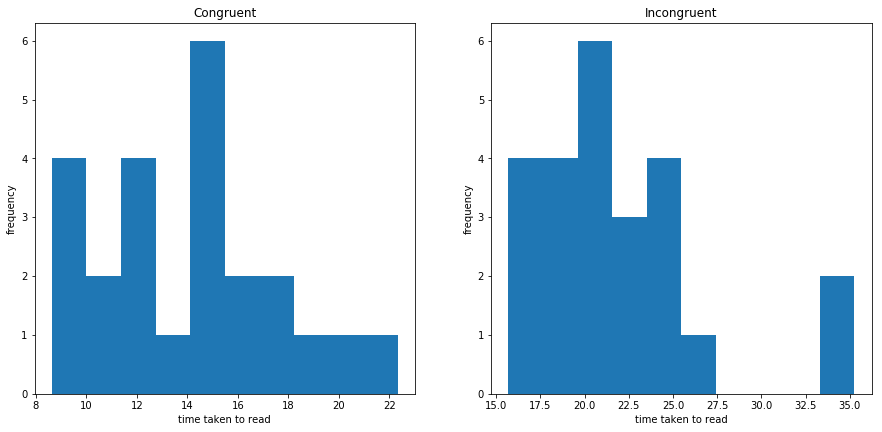

In [15]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.hist(x = df['Congruent'])
plt.title('Congruent')
plt.ylabel('frequency')
plt.xlabel('time taken to read')

plt.subplot(2,2,2)
plt.hist(x = df['Incongruent'])
plt.title('Incongruent')
plt.ylabel('frequency')
plt.xlabel('time taken to read');


Considering the histogram on the right, the incongruent data lies mostly between approximately 16 and 27.5 seconds.  The histogram on the left shows that the time taken to read the congruent data ranges from approximately 9 seconds up to 22.5 seconds.
The minimum and maximum time seen on the congruent data graph are lower than the respective minimum and maximum time on the incongruent graph. This agrees with what is expected, since it would make sense that it would take longer to read the incongruent data.

I will now perform the statistical test and investigate the results. 

In [16]:
diff = mean_incon-mean_con
diff

7.964791666666665

In [17]:
diff_means = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0],replace=True)
    congru_mean = b_samp['Congruent'].mean()
    incongru_mean = b_samp['Incongruent'].mean()
    diff_means.append(incongru_mean - congru_mean)

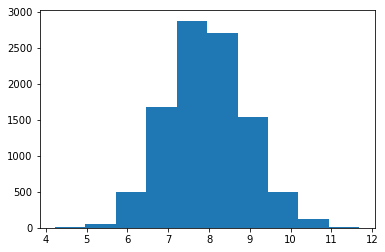

In [18]:
plt.hist(diff_means);

In [19]:
diffs_means = np.array(diff_means)

In [20]:
null_vals = np.random.normal(0,diffs_means.std(),diffs_means.size)

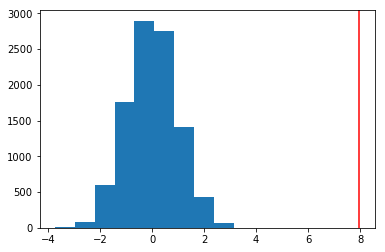

In [21]:
plt.hist(null_vals)
plt.axvline(x = diff,color = 'red');

In [22]:
pval = (null_vals>diff).mean()
pval

0.0

The hypothesis test showed that there is enough evidence to reject the null hypothesis and hence show that the time taken to read the incongruent data is higher than the time taken to read the congruent data. <br/>

From the histgram above one can see that the difference in means between congruent and incongruent times, calculated from the sample data, lie far from the difference in means values obtained from the sample distribution under the null hypothesis. As can be seen from the code cell above, this results in a p-value of 0. Choosing a critical statistic value of 0.05, this p-value of 0 indicates that the Null hypothesis should be rejected - with a confidence level of 90%.

For the above hypothesis test I used bootstrapping to find the p-value, I will now carry out the t-test as well.

In [23]:
 np.random.seed(12345678)

In [24]:
t,pval=stats.ttest_rel(a=df['Incongruent'], b=df['Congruent'])

In [25]:
t

8.020706944109957

In [26]:
pval

4.1030005857111781e-08

From the above results one van see that the p-value is very close to zero - this agrees with the p-value obtained using the bootstrapping method. "t" is our test statistic in this case and it is equal to "8.0207" to 4 decimal places.

The reason it takes longer to read the incongruent data is most likely because of the interference between the two processes in which your brain identifies the colour of the word and interprets the word's meaning. The two theories that explain this, which is known as the Stroop effect, is: <br/>
Speed of Processing Theory: the interference occurs because words are read faster than colors are named. <br/>
Selective Attention Theory: the interference occurs because naming colors requires more attention than reading words.

Another experiment that can be carried out to create this same effect is using the words "small, medium, large" in small, medium, and large font sizes. In the congruent dataset the font size of the word must match it's meaning, for example, if the word is "small" it should be written in the small font. In the incongruent dataset the font size and word should not match, for example, if the word is "small" it could be written in a large or medium font. The size of the word should then be read out, rather than the word itself. Timing how long it takes to read this incongruent and congruent dataset may very likely show the same phenomenon observed in the dataset investigated in this project - that is, it will probably be easier to read the word than identify the size of the word.

## Resources

https://faculty.washington.edu/chudler/words.html#seffect <br/>
http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/tests-of-means/why-use-paired-t/ <br/>
http://www.psychology.emory.edu/clinical/bliwise/Tutorials/TOM/meanstests/assump.htm <br/>
http://www.dummies.com/education/math/statistics/how-to-use-the-t-test-to-handle-small-samples-and-unknown-standard-deviations/